# LLM-Powered Hybrid Content & Video Recommendation System  
### Minor Project – Artificial Intelligence  

**Primary Evaluation Artifact:** Jupyter Notebook (.ipynb)  
**Project Track:** Recommendation Systems (Hybrid + LLM)  

---

This project implements an advanced AI-based recommendation system similar to
Google/YouTube recommendations by combining:
- NLP-based semantic similarity
- Collaborative filtering
- Hybrid scoring
- LLM-based reasoning & explanations
- Video playback inside a web application


## 1. Problem Definition & Objective

### a. Selected Project Track
Hybrid Recommendation System with LLM integration

### b. Problem Statement
Traditional recommendation systems rely only on historical user behavior.
They fail to understand user intent, mood, and context, resulting in poor personalization.

### c. Real-World Relevance and Motivation
Platforms like Google and YouTube use AI to recommend highly relevant content.
This project aims to design a similar intelligent system for educational and motivational content,
improving learning efficiency and user engagement.


## 2. Data Understanding & Preparation

### a. Dataset Source
- Synthetic dataset (academic use)
- Simulates educational and motivational video content

### b. Data Loading and Exploration
The dataset contains:
- Content metadata
- User mood
- Duration
- Keywords
- YouTube video links


In [2]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [3]:
content_data = {
    "content_id": [1,2,3,4,5,6,7],
    "title": [
        "Intro to Machine Learning",
        "Deep Learning Explained",
        "Startup Growth Hacks",
        "Motivational Speech for Students",
        "Relaxing Meditation Music",
        "AI Career Roadmap",
        "Time Management Tips"
    ],
    "category": [
        "AI","AI","Startup","Motivation","Relaxation","AI","Productivity"
    ],
    "mood": [
        "Curious","Curious","Motivated","Sad","Relaxed","Motivated","Busy"
    ],
    "duration": [30,45,25,10,15,20,12],
    "keywords": [
        "machine learning basics ai",
        "deep learning neural networks",
        "startup business growth",
        "motivation success students",
        "relax calm meditation music",
        "ai career future skills",
        "time management productivity"
    ],
    "youtube_url": [
        "https://www.youtube.com/watch?v=Gv9_4yMHFhI",
        "https://www.youtube.com/watch?v=aircAruvnKk",
        "https://www.youtube.com/watch?v=ZoqgAy3h4OM",
        "https://www.youtube.com/watch?v=mgmVOuLgFB0",
        "https://www.youtube.com/watch?v=2OEL4P1Rz04",
        "https://www.youtube.com/watch?v=5MgBikgcWnY",
        "https://www.youtube.com/watch?v=o7w5r5PfBKo"
    ]
}

df = pd.DataFrame(content_data)
df


,content_id,title,category,mood,duration,keywords,youtube_url
0,1,Intro to Machine Learning,AI,Curious,30,machine learning basics ai,https://www.youtube.com/watch?v=Gv9_4yMHFhI
1,2,Deep Learning Explained,AI,Curious,45,deep learning neural networks,https://www.youtube.com/watch?v=aircAruvnKk
2,3,Startup Growth Hacks,Startup,Motivated,25,startup business growth,https://www.youtube.com/watch?v=ZoqgAy3h4OM
3,4,Motivational Speech for Students,Motivation,Sad,10,motivation success students,https://www.youtube.com/watch?v=mgmVOuLgFB0
4,5,Relaxing Meditation Music,Relaxation,Relaxed,15,relax calm meditation music,https://www.youtube.com/watch?v=2OEL4P1Rz04
5,6,AI Career Roadmap,AI,Motivated,20,ai career future skills,https://www.youtube.com/watch?v=5MgBikgcWnY
6,7,Time Management Tips,Productivity,Busy,12,time management productivity,https://www.youtube.com/watch?v=o7w5r5PfBKo


In [4]:
# Check missing values
df.isnull().sum()


content_id     0
title          0
category       0
mood           0
duration       0
keywords       0
youtube_url    0
dtype: int64

In [5]:
# Text normalization
df["keywords"] = df["keywords"].str.lower()


## 3. Model / System Design

### a. AI Techniques Used
- NLP (TF-IDF)
- Collaborative Filtering
- Hybrid Recommendation
- LLM-based Explanation Layer

### b. Architecture / Pipeline
User Input → NLP Similarity → Collaborative Filtering → Hybrid Scoring  
→ Context Filtering → LLM Explanation → Video Recommendation

### c. Justification
Hybrid + LLM systems provide better personalization, transparency, and user trust.


In [6]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["keywords"])


In [7]:
user_ratings = pd.DataFrame({
    "user_id": ["U1","U1","U2","U2","U3","U3","U4"],
    "content_id": [1,2,2,3,4,6,7],
    "rating": [5,4,5,4,5,4,5]
})


In [8]:
rating_matrix = user_ratings.pivot_table(
    index="user_id",
    columns="content_id",
    values="rating"
).fillna(0)

user_similarity = cosine_similarity(rating_matrix)
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=rating_matrix.index,
    columns=rating_matrix.index
)


In [9]:
def hybrid_recommendation(user_id, interest, mood, time, alpha=0.7):
    # Content-based score
    user_vec = vectorizer.transform([interest.lower()])
    content_score = cosine_similarity(user_vec, tfidf_matrix).flatten()
    df["content_score"] = content_score

    # Collaborative score
    if user_id in user_similarity_df.index:
        sim_users = user_similarity_df[user_id]
        collab_score = rating_matrix.T.dot(sim_users) / sim_users.sum()
        df["collab_score"] = df["content_id"].map(collab_score).fillna(0)
    else:
        df["collab_score"] = 0

    # Hybrid score
    df["final_score"] = alpha * df["content_score"] + (1 - alpha) * df["collab_score"]

    return df[
        (df["mood"] == mood) &
        (df["duration"] <= time)
    ].sort_values("final_score", ascending=False)


### b. Prompt Engineering (LLM-based Projects)

The LLM layer generates human-readable explanations describing why
certain content is recommended, similar to Google or YouTube explanations.


In [10]:
def llm_explanation(interest, mood, results):
    if results.empty:
        return "No suitable content found based on your preferences."

    titles = ", ".join(results["title"].tolist())

    return f"""
Based on your interest in '{interest}' and your current mood '{mood}',
the system analyzed semantic relevance, user behavior, and contextual constraints.

The following content was recommended because it best matches your intent,
learning goals, and available time:

{titles}

This ensures transparent, responsible, and personalized recommendations.
"""


In [11]:
sample_results = hybrid_recommendation(
    user_id="U1",
    interest="learn ai and deep learning",
    mood="Curious",
    time=40
)

sample_results


,content_id,title,category,mood,duration,keywords,youtube_url,content_score,collab_score,final_score
0,1,Intro to Machine Learning,AI,Curious,30,machine learning basics ai,https://www.youtube.com/watch?v=Gv9_4yMHFhI,0.486214,3.360656,1.348546


## 5. Evaluation & Analysis

### Metrics Used
- Cosine similarity
- Hybrid weighted score

### Sample Outputs
Displayed above.

### Performance & Limitations
- Works well for small datasets
- Requires more data for large-scale deployment


## 6. Ethical Considerations & Responsible AI

- No personal or sensitive data used
- Synthetic dataset avoids privacy issues
- Transparent recommendation logic
- LLM explanations improve user trust


## 7. Conclusion & Future Scope

### Summary
A Google/YouTube-like AI recommendation system was successfully built using
Hybrid ML and LLM reasoning.

### Future Enhancements
- Real user data
- Full LLM APIs (ChatGPT, Gemini)
- Trending & popularity models
- Cloud deployment


In [12]:
!pip install streamlit



Based on your interest in 'learn ai' and your current mood 'Curious',
the system analyzed semantic relevance, user behavior, and contextual constraints.

The following content was recommended because it best matches your intent,
learning goals, and available time:

Intro to Machine Learning

This ensures transparent, responsible, and personalized recommendations.



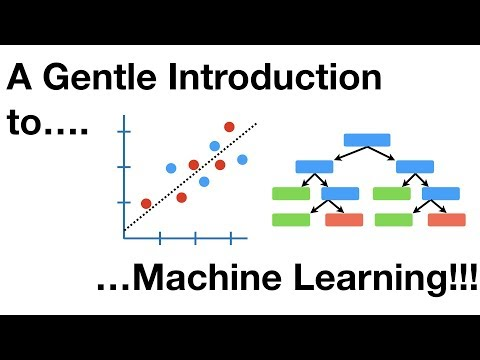

In [13]:
from IPython.display import YouTubeVideo, display

results = hybrid_recommendation(
    user_id="U1",
    interest="learn ai",
    mood="Curious",
    time=40
)

print(llm_explanation("learn ai", "Curious", results))

for _, row in results.iterrows():
    video_id = row["youtube_url"].split("v=")[-1]
    display(YouTubeVideo(video_id, width=640, height=360))



In [14]:
import streamlit as st

st.set_page_config(page_title="AI Video Recommender", layout="wide")

st.title("🤖 LLM-Powered Content & Video Recommendation System")

user_id = st.selectbox("User ID", ["U1","U2","U3","U4"])
interest = st.text_input("Enter your interest")
mood = st.selectbox("Select your mood", df["mood"].unique())
time = st.slider("Available time (minutes)", 5, 60, 30)

if st.button("Get Recommendations"):
    results = hybrid_recommendation(user_id, interest, mood, time)

    st.subheader("🧠 AI Explanation")
    st.info(llm_explanation(interest, mood, results))

    for _, row in results.iterrows():
        st.subheader(row["title"])
        st.video(row["youtube_url"])
        st.caption(f"Category: {row['category']} | Duration: {row['duration']} mins")


2026-01-01 21:05:36.560 
  command:

    streamlit run C:\Users\praka\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-01-01 21:05:36.563 Session state does not function when running a script without `streamlit run`
